In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from google.colab import files
files.upload()

Saving SampleSuperstore.csv to SampleSuperstore (1).csv


{'SampleSuperstore (1).csv': b'Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit\r\nSecond Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0,41.9136\r\nSecond Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0,219.582\r\nSecond Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0,6.8714\r\nStandard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.031\r\nStandard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164\r\nStandard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.86,7,0,14.1694\r\nStandard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.28,4,0,1.9656\r\nStandard Class,Consumer,United States,Los Angeles,California,9

In [15]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [17]:
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [18]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns


Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub-category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [19]:
df.columns = df.columns.str.replace('-', '_')
df.columns

Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub_category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [20]:
vendas_categoria = (
    df.groupby('category')['sales']
    .sum()
    .sort_values(ascending=False)
)

vendas_categoria

,sales
category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


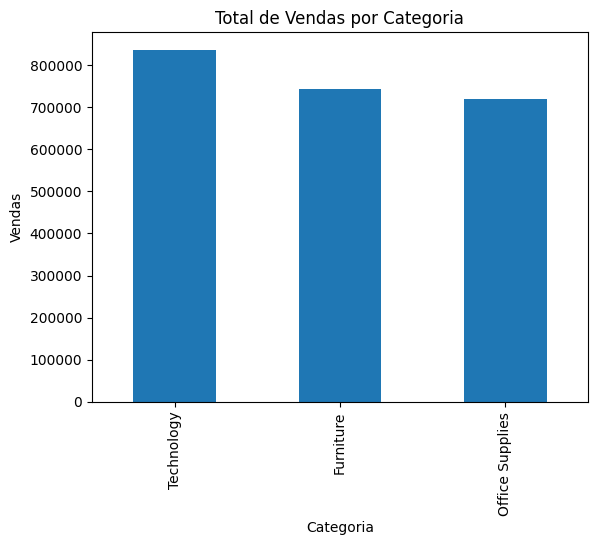

In [21]:
vendas_categoria.plot(kind='bar')
plt.title('Total de Vendas por Categoria')
plt.ylabel('Vendas')
plt.xlabel('Categoria')
plt.show()

In [22]:
lucro_categoria = (
    df.groupby('category')['profit']
    .sum()
    .sort_values(ascending=False)
)

lucro_categoria

,profit
category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


In [23]:
regiao = (
    df.groupby('region')[['sales', 'profit']]
    .sum()
    .sort_values(by='sales', ascending=False)
)

regiao

,sales,profit
region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


In [24]:
(df.groupby('category')[['sales','profit']]
 .sum()
 .assign(margem=lambda x: x['profit']/x['sales']*100)
 .sort_values('margem', ascending=False))


,sales,profit,margem
category,,,
Technology,836154.0330,145454.9481,17.395712
Office Supplies,719047.0320,122490.8008,17.035158
Furniture,741999.7953,18451.2728,2.486695


In [25]:
df.groupby('category')['discount'].mean().sort_values(ascending=False)


,discount
category,
Furniture,0.173923
Office Supplies,0.157285
Technology,0.132323


In [26]:
df.groupby('category')['discount'].median()

,discount
category,
Furniture,0.2
Office Supplies,0.0
Technology,0.2


In [28]:
(df[df['category'] == 'Furniture']
 .groupby('sub_category')[['sales','profit']]
 .sum()
 .sort_values('profit'))

,sales,profit
sub_category,,
Tables,206965.5320,-17725.4811
Bookcases,114879.9963,-3472.5560
Furnishings,91705.1640,13059.1436
Chairs,328449.1030,26590.1663
